In [1]:
# Importing the basic libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data

df = pd.read_csv("D:\maxgenn_assignments\practice_csv_files\loan_data.csv")

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ABC\AppData\Local\Temp\ipykernel_18952\3138354375.py:3: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("D:\maxgenn_assignments\practice_csv_files\loan_data.csv")


In [3]:
# Reading first 5 rows

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
# Cheking the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
# Cheking the null values

df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

There are many values missing lets check the repescted columns and replace it something that is usefull

In [6]:
# For Gender column 

df['Gender'] = df['Gender'].replace(np.nan, df['Gender'].mode()[0])

In [7]:
# For Dependents columns

df['Dependents'] = df['Dependents'].replace(np.nan, df['Dependents'].mode()[0])
print(df['Dependents'].unique())

['1' '0' '2' '3+']


In [8]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].fillna(0).astype(int)

In [9]:
# For Self employed columns

df['Self_Employed'] = df['Self_Employed'].replace(np.nan, df['Self_Employed'].mode()[0])

In [10]:
# For laon amount term and credit history we cannot fill any random value so we fill that with unknown values

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(0.0)
df['Credit_History'] = df['Credit_History'].fillna(0.0)

Now our data is cleaned and lets check if there is any null values

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    int32  
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 37.3+ KB


In [13]:
# Cheking that our data hass not any duplicate values

df.duplicated().sum()

0

Now our data is cleaned

In [14]:
# cheking the columns

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# lets plot graphs and charts

1 - Histogram of aplicant income

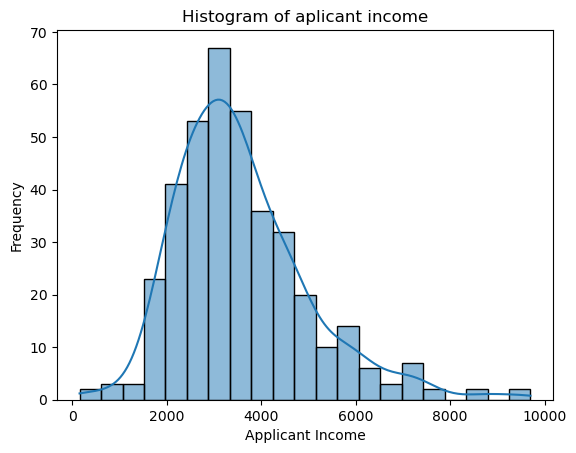

In [15]:
sns.histplot(df['ApplicantIncome'] ,kde = True)
plt.title('Histogram of aplicant income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

From above graph we can predict that applicant having income around between 1500 to 6000 are more applying for the loan

2 - Cheking the loan status vs approved graph

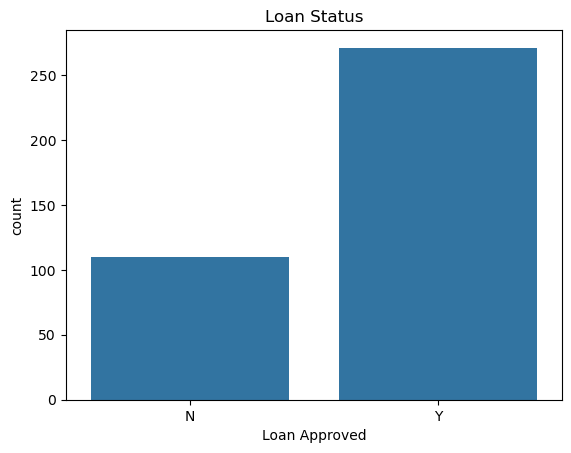

In [16]:
sns.countplot(x = 'Loan_Status' , data = df)
plt.title('Loan Status')
plt.xlabel('Loan Approved')
plt.ylabel('count')
plt.show()

3 - Avg loan amount by Education

In [17]:
avg_loan_amount_by_education = df.groupby('Education')['LoanAmount'].mean().reset_index()

avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.190647
1,Not Graduate,104.436893


There is not so much difference

4 - Loan amount distributed on the basis of property

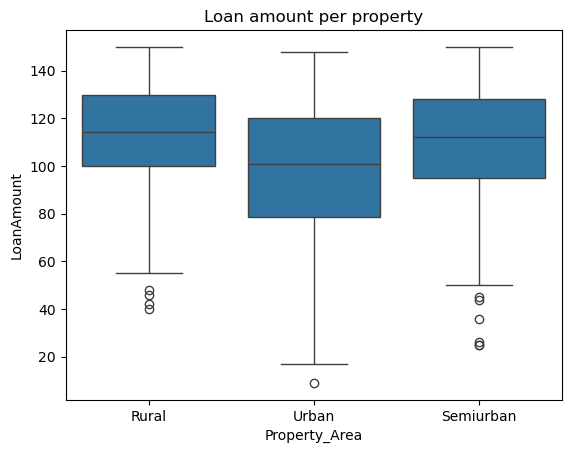

In [18]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount', data = df)
plt.title('Loan amount per property')
plt.xlabel('Property_Area')
plt.ylabel('LoanAmount')
plt.show()

5 - Loan Status by Gender

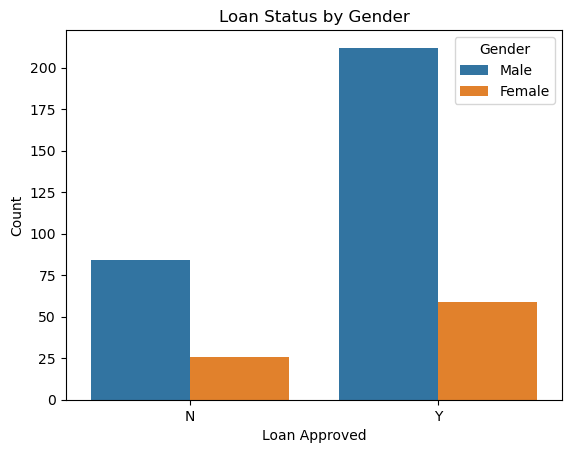

In [19]:
sns.countplot(x= 'Loan_Status' ,hue = 'Gender' ,data = df)
plt.title('Loan Status by Gender')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

6 - Male vs Female

<Axes: ylabel='count'>

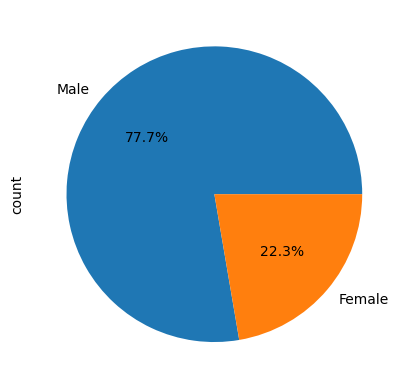

In [20]:
df['Gender'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

Male is mostly present in our data

7 - Applicant Income and loan amount needed

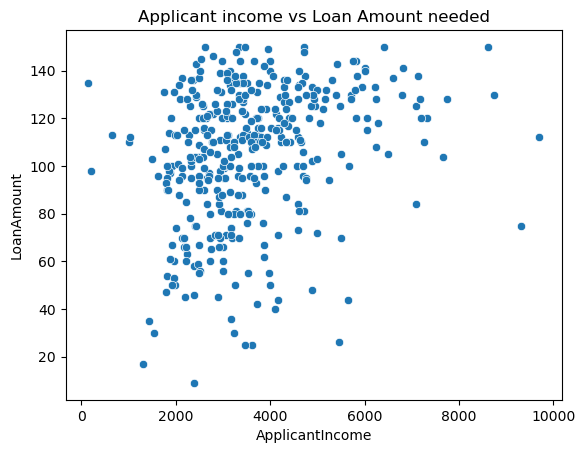

In [21]:
sns.scatterplot(x = 'ApplicantIncome',y = 'LoanAmount',data = df)
plt.title('Applicant income vs Loan Amount needed')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

8 - Corelation heat map

In [22]:
num_df = df.select_dtypes(include = ['int32','int64','float64'])
num_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,4583,1508.0,128.0,360.0,1.0
1,0,3000,0.0,66.0,360.0,1.0
2,0,2583,2358.0,120.0,360.0,1.0
3,0,6000,0.0,141.0,360.0,1.0
4,0,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...,...
376,3,5703,0.0,128.0,360.0,1.0
377,0,3232,1950.0,108.0,360.0,1.0
378,0,2900,0.0,71.0,360.0,1.0
379,3,4106,0.0,40.0,180.0,1.0


In [23]:
correlation_matrix = num_df.corr()
correlation_matrix

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.143238,-0.067536,0.087036,-0.042158,-0.006339
ApplicantIncome,0.143238,1.000000,-0.248693,0.270681,-0.107948,0.036175
CoapplicantIncome,-0.067536,-0.248693,1.000000,0.114936,-0.006783,0.007692
LoanAmount,0.087036,0.270681,0.114936,1.000000,0.107010,-0.037784
Loan_Amount_Term,-0.042158,-0.107948,-0.006783,0.107010,1.000000,0.069559
Credit_History,-0.006339,0.036175,0.007692,-0.037784,0.069559,1.000000


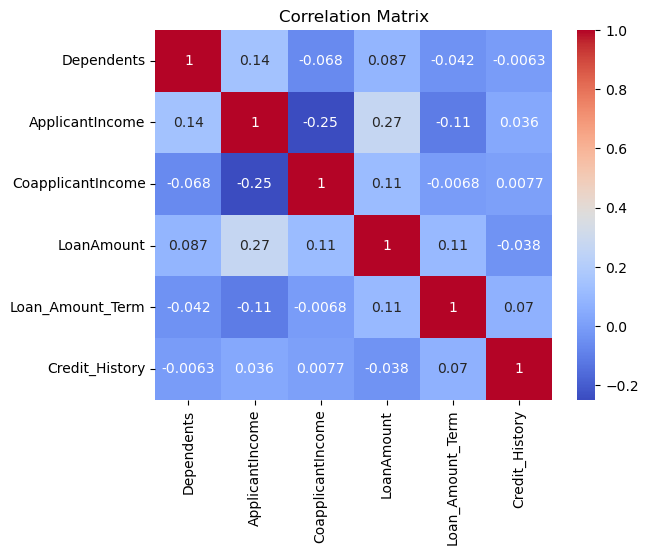

In [24]:
sns.heatmap(correlation_matrix , annot = True ,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

Applying Feature Engineering

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    int32  
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 37.3+ KB


In [26]:
# Encoding some of our coulmns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['Gender'] = le.fit_transform(df['Gender'])

df['Married'] = le.fit_transform(df['Married'])

df['Education'] = le.fit_transform(df['Education'])

df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

df['Property_Area'] = le.fit_transform(df['Property_Area'])

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [27]:
# Defining dependent and independent variable

X = df.drop(columns = ['Loan_Status','Loan_ID'])
y = df['Loan_Status']

In [28]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,5703,0.0,128.0,360.0,1.0,2
377,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0
378,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
379,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0


In [29]:
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: int32

Training the module

In [30]:
# Spliting the data into train and test

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X , y, test_size = 0.2,random_state = 0)

In [31]:
# model_selection

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [32]:
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# cheking the accuracy score

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f"Model Performance (accuracy score): {score:.2f}")

Model Performance (accuracy score): 0.78


Appling KNN model

In [34]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors' : [3,5,7,8,9],
             'weights' : ['uniform','distance']}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(X_train,y_train.values.ravel())



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [35]:
gridkn.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')

y_pred = gridkn.predict(X_test)

In [37]:
# cheking the accuracy score of knn model

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f"Model Performance (accuracy score): {score:.2f}")

Model Performance (accuracy score): 0.68


Applying support vector machine

In [38]:
from sklearn.svm import SVC

svc = SVC()
param_grid_svc = {'C' : [0.01,0.1,0.5],'kernel' : ['linear','rbf','poly']}

In [40]:
gridsvc = GridSearchCV(svc,param_grid_svc)
gridsvc.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [42]:
y_pred = gridsvc.predict(X_test)

In [43]:
# cheking the accuracy score of knn model

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(f"Model Performance (accuracy score): {score:.2f}")

Model Performance (accuracy score): 0.78


In [46]:
import joblib
joblib.dump(lr , 'model.pkl')

['model.pkl']